 **Problem statement**

* This dataset contain a data of used cars sold on cardehko.com in India as well as important features of these cars.
* If user can predict the price of the car based on input features.
* Prediction results can be used to give new seller the price suggestion based on market condition.

** Data Collection.**
* The Dataset is collected from scrapping from cardheko webiste
* The data consists of 13 column and 15411 rows.

** Import Data and Required Packages**

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



 Import the CSV Data as Pandas DataFrame**

In [424]:
df = pd.read_csv("/content/cardekho_dataset.csv")
df.head(5)

,id,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [425]:
df=df.drop('id',axis=1)

**Shape of the dataset**

In [426]:
df.shape

(15411, 13)

**Observation**

in this dataset tha dataset contain 154111 rows and 13

**Summary of the dataset**

In [427]:
# Display summary statistics for a dataframe
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


**Observation**

*we can observe that vihicle age having outliers because the mean value of this column is 6 but the maximum age is 29

*in engine and max_power column column also has some amount of outliers


**Check Datatypes in the dataset**

In [428]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


**Observation**

*In this dataset 6 columns has object as a data type

*2 columns has a float64 as data type[mileage,max_power]

*other 5 columns has int64 as data type

 EXPLORING DATA

In [429]:
# defining numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

We have 6 categorical features : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


 Feature Information
* **car_name:** Car's Full name, which includes brand and specific model name.
* **brand:** Brand Name of the particular car.
* **model:** Exact model name of the car of a particular brand.
* **seller_type:** Which Type of seller is selling the used car
* **fuel_type:** Fuel used in the used car, which was put up on sale.
* **transmission_type:** Transmission used in the used car, which was put on sale.
* **vehicle_age:** The count of years since car was bought.
* **mileage:** It is the number of kilometer the car runs per litre.
* **engine:** It is the engine capacity in cc(cubic centimeters)
* **max_power:** Max power it produces in BHP.
* **seats:** Total number of seats in car.
* **selling_price:** The sale price which was put up on website.

In [430]:
# count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts())
    print('---------------------------')

Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
                     ... 
Mercedes-AMG C          1
Tata Altroz             1
Ferrari GTC4Lusso       1
Hyundai Aura            1
Force Gurkha            1
Name: car_name, Length: 121, dtype: int64
---------------------------
Maruti           4992
Hyundai          2982
Honda            1485
Mahindra         1011
Toyota            793
Ford              790
Volkswagen        620
Renault           536
BMW               439
Tata              430
Mercedes-Benz     337
Skoda             334
Audi              192
Datsun            170
Jaguar             59
Land Rover         51
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Lexus              10
Isuzu               8
Bentley             3
Maserati            2
ISUZU               2
Ferrari             1
Merced

Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

### Numerical Features

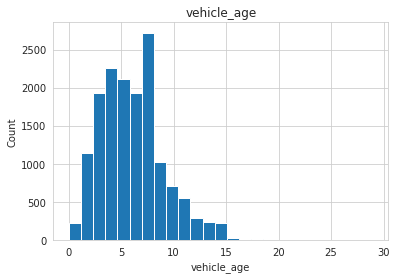

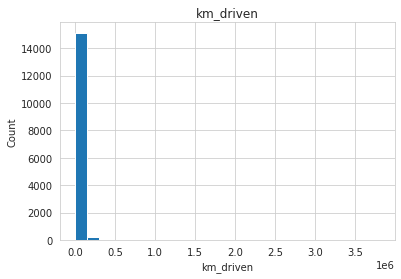

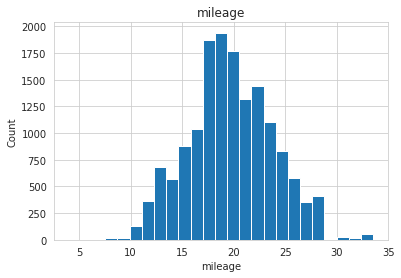

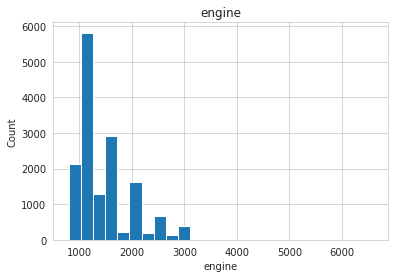

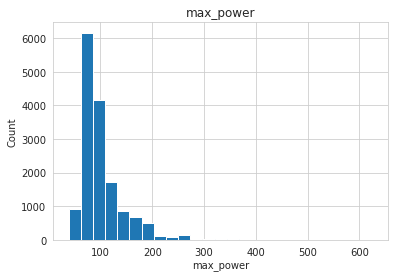

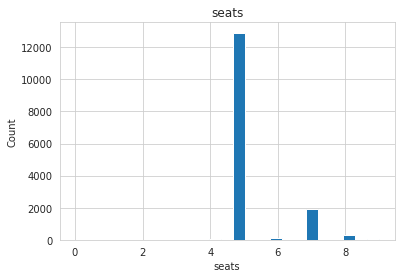

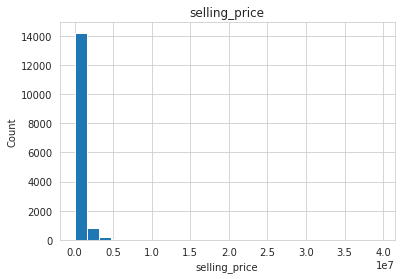

In [431]:
#check the distribution of numerical features in dataset
for feature in numeric_features:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

**Observation**
* Km_driven, max_power, selling_price, and engine are right skewed and postively skewed.
* Outliers in km_driven, enginer, selling_price, and max power.

Categorical Features

CHEKING THE DISTRIBUTION OF CATEGORICAL FEATURES

<AxesSubplot:xlabel='brand', ylabel='count'>

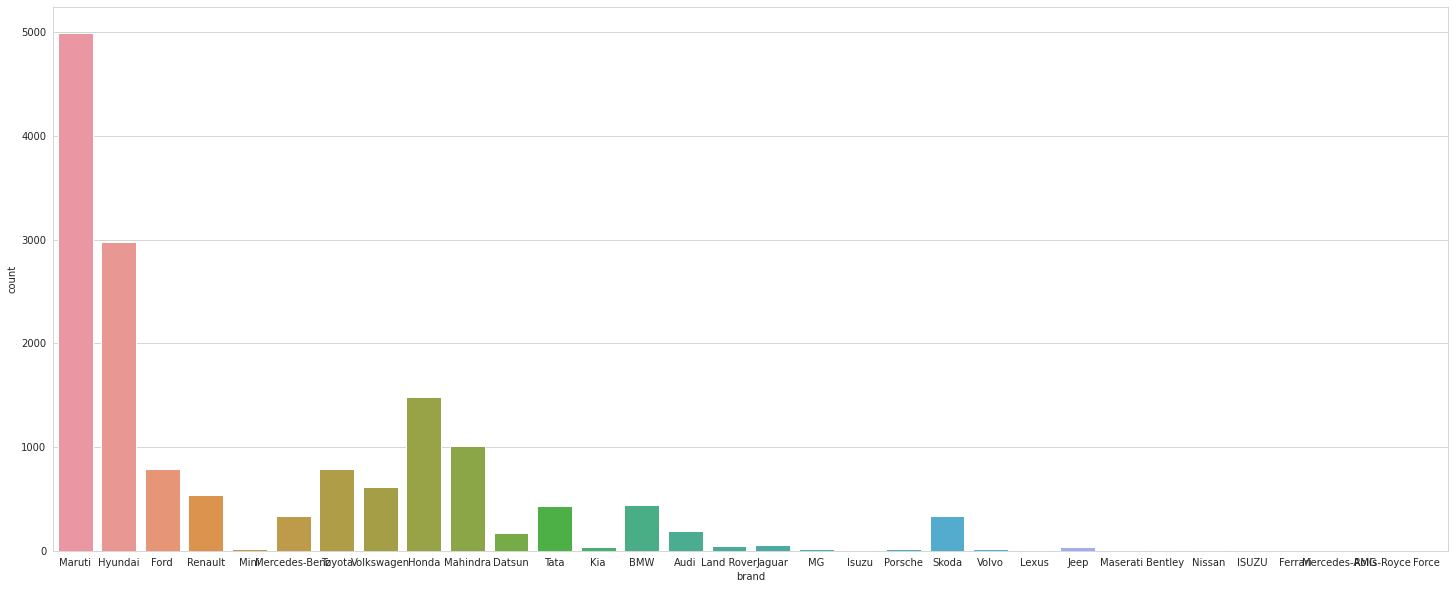

In [432]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.set_style('whitegrid')
sns.countplot(x='brand',data=df,ax=ax)

**Observation**

from above plot we can observe Maruthi brand having a highest sell foloowed by Hyundai and Honda

<AxesSubplot:xlabel='seller_type', ylabel='count'>

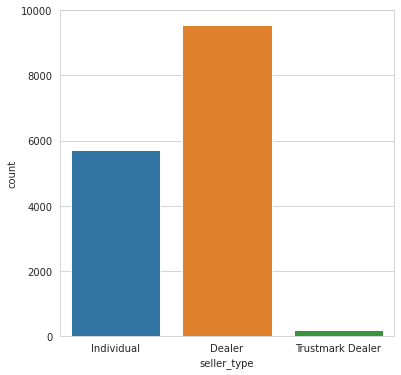

In [433]:
fig, ax = plt.subplots(figsize=(6,6))
sns.set_style('whitegrid')
sns.countplot(x='seller_type',data=df,ax=ax)

**Observation**

from above count plot we can observe the seller_type feature having 3 types 

1.individual
2.dealer seller_type
3.trustmark Dealer

in this we can also observe that dealer seller_type haviing highest count

<AxesSubplot:xlabel='fuel_type', ylabel='count'>

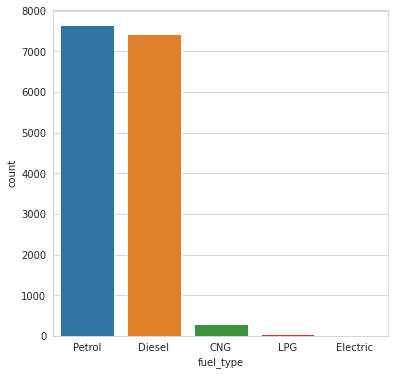

In [434]:
fig, ax = plt.subplots(figsize=(6,6))
sns.set_style('whitegrid')
sns.countplot(x='fuel_type',data=df,ax=ax)

**Observation**

from above count plot we can observe the fuel type feature having 5 types 

1.petrol
2.Diesel
3.CNG fuel_type
4.LPG
5.Electric

in this we can also observe that dealer petrol and diesel haviing highest count

<AxesSubplot:xlabel='transmission_type', ylabel='count'>

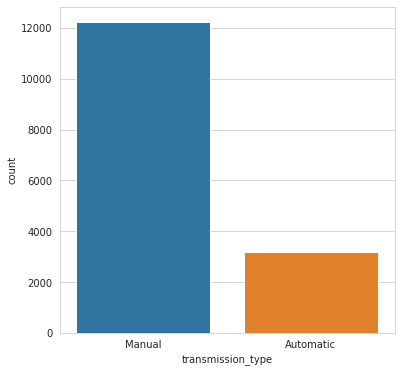

In [435]:
fig, ax = plt.subplots(figsize=(6,6))
sns.set_style('whitegrid')
sns.countplot(x='transmission_type',data=df,ax=ax)

**Observation**

from above count plot we can observe the transmission_type feature having 3 types 

1.Manual
2.automatic


in this we can also observe that  manual haviing highest count

### Checking Null Values

In [436]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

**Observation**

ther is no null values in dataset

In [437]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']


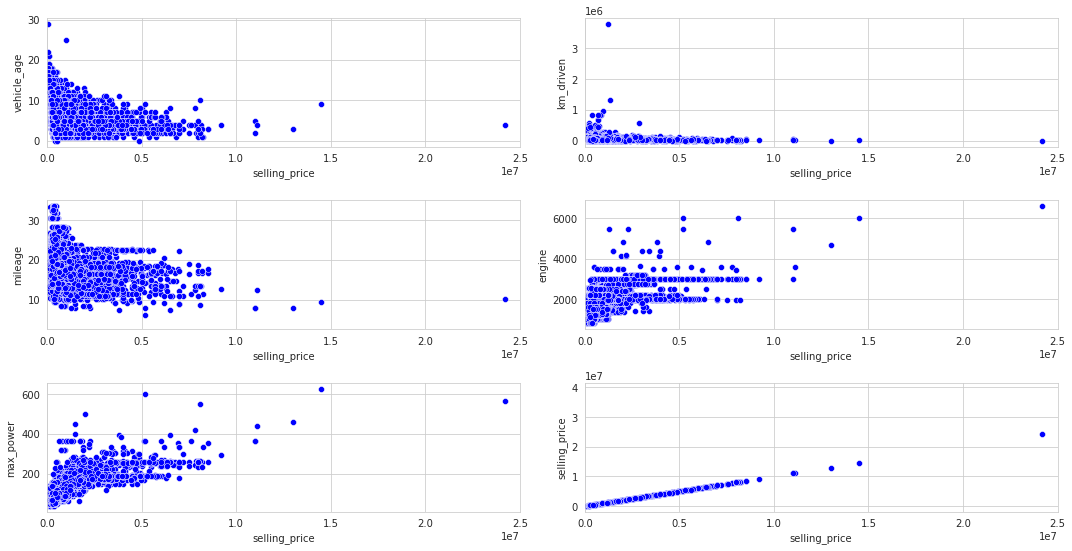

In [438]:
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(continues_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data= df ,x='selling_price', y=continues_features[i], color='b')
    plt.xlim(0,25000000) # Limit to 25 lakhs Rupees to view clean
    plt.tight_layout()

**Observation**
* **Lower Vehicle age has more selling price than Vehicle with more age.**
* **Engine CC has positive effect on price,Vehicle with 2000 cc **
* **Kms Driven has negative effect on selling price.**

Visualize the Target Feature

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

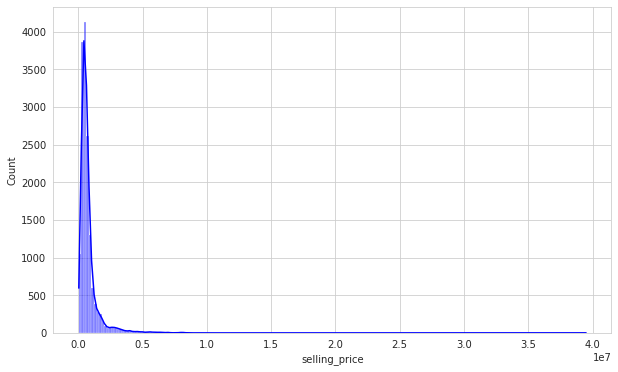

In [439]:
fig, ax = plt.subplots(figsize=(10,6))
sns.set_style('whitegrid')
sns.histplot(x='selling_price', bins=200, kde=True, color = 'b',data=df,ax=ax)


* From the chart we can see  Target Variable Skewed

Most Selling car in Used car website

In [440]:
df.car_name.value_counts()[0:10]

Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: car_name, dtype: int64

 Most Selling Used Car is Hyundai i20

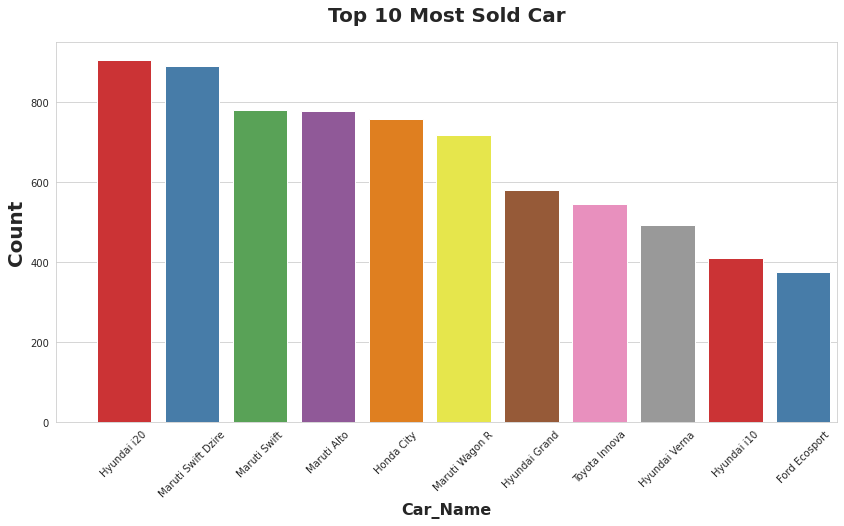

In [441]:
plt.subplots(figsize=(14,7))
sns.countplot(x="car_name", data=df,palette="Set1",order = df['car_name'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car_Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

**Observation**

from the above plot we can observe these are the top 10 most sold cars

Hyundai i20 is top most sold car folwwed by Maruthi Swift Dzire ,Maruthi Swift

 Checking mean price of Hyundai i20 which is most sold

In [442]:
i20 = df[df['car_name'] == 'Hyundai i20']['selling_price'].mean()
print(f'The mean price of Hyundai i20 is {i20:.2f} Rupees')

The mean price of Hyundai i20 is 543603.75 Rupees


**Observation:**
* from the above Chart these are top 10 most selling cars in used car website.
* Of the total cars sold Hyundai i20 shares 5.8% of total ads posted and followed by Maruti Swift Dzire.
* Mean Price of Most Sold Car is 5.4 lakhs.


 Most selling brand 

In [443]:
df.brand.value_counts()[0:10]

Maruti        4992
Hyundai       2982
Honda         1485
Mahindra      1011
Toyota         793
Ford           790
Volkswagen     620
Renault        536
BMW            439
Tata           430
Name: brand, dtype: int64

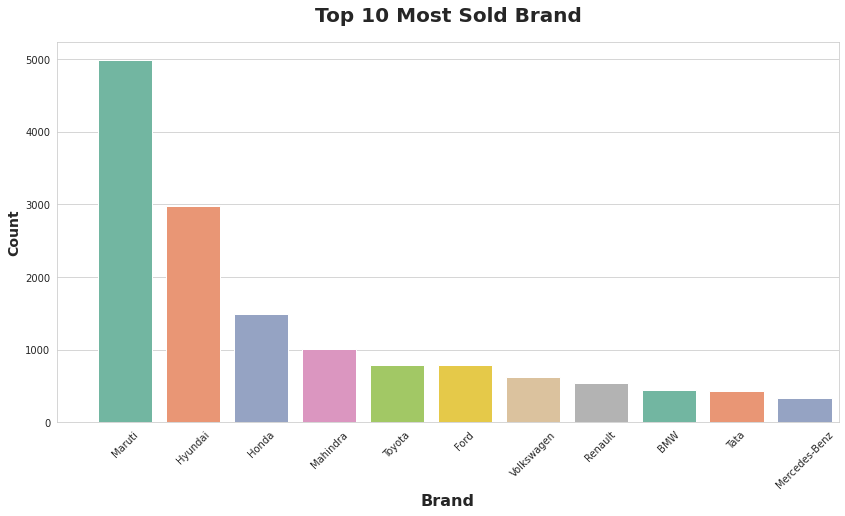

In [444]:
plt.subplots(figsize=(14,7))
sns.countplot(x="brand", data=df,palette="Set2",order = df['brand'].value_counts().index)
plt.title("Top 10 Most Sold Brand", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("Brand", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

 Check the Mean price of Maruti brand which is most sold

In [445]:
maruti = df[df['brand'] == 'Maruti']['selling_price'].mean()
print(f'The mean price of Maruti is {maruti:.2f} Rupees')

The mean price of Maruti is 487089.32 Rupees


**Observation:**
* from  the above Chart Maruti has the most share of Ads in Used car website and Maruti is the most sold brand.
* Following Maruti we have Hyundai and Honda.
* Mean Price of Maruti Brand is 4.8 lakhs.

Costliest Brand and Costliest Car 

In [446]:
brand = df.groupby('brand').selling_price.max()
brand_df = brand.to_frame().sort_values('selling_price',ascending=False)[0:10]
brand_df

,selling_price
brand,
Ferrari,39500000
Rolls-Royce,24200000
Bentley,14500000
Mercedes-Benz,13000000
Porsche,11100000
Land Rover,9200000
BMW,8500000
Volvo,8195000
Lexus,8000000


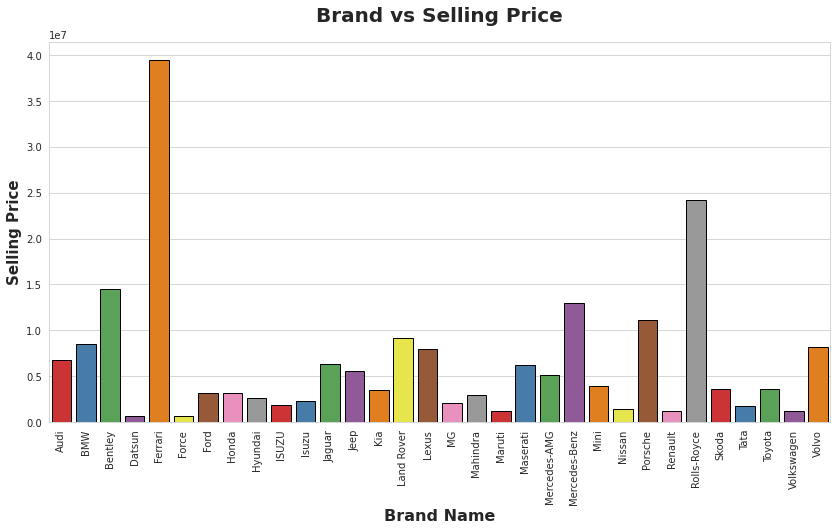

In [447]:
plt.subplots(figsize=(14,7))
sns.barplot(x=brand.index, y=brand.values,ec = "black",palette="Set1")
plt.title("Brand vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

**Report:**
* Costliest Brand sold is Ferrari at 3.95 Crores.
* Second most costliest car Brand is Rolls-Royce as 2.42 Crores.


Costliest Car

In [448]:
car= df.groupby('car_name').selling_price.max()
car =car.to_frame().sort_values('selling_price',ascending=False)[0:10]
car

,selling_price
car_name,
Ferrari GTC4Lusso,39500000
Rolls-Royce Ghost,24200000
Bentley Continental,14500000
Mercedes-Benz S-Class,13000000
Porsche Cayenne,11100000
Land Rover Rover,9200000
BMW 7,8500000
BMW Z4,8250000
Volvo XC,8195000


<AxesSubplot:xlabel='car_name', ylabel='selling_price'>

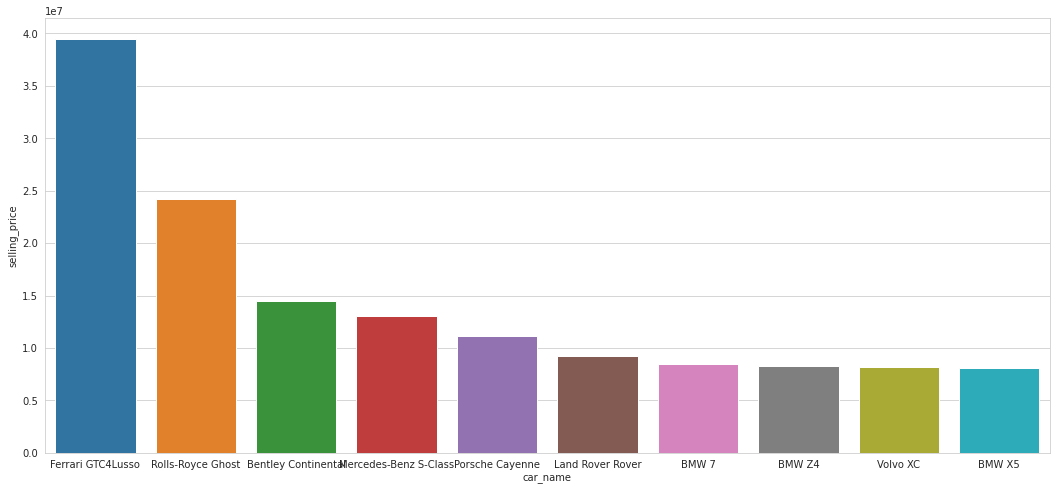

In [449]:
fig, ax = plt.subplots(figsize=(18,8))
sns.set_style('whitegrid')
sns.barplot(x=car.index, y=car.selling_price)

**Observation**
* Costliest Car sold is Ferrari GTC4 Lusso followed by Rolls Royce Ghost.
* Ferrari selling price is 3.95 Crs.
* Other than Ferrari and RR other car has priced below 1.5cr.

 Most Mileage Brand and Car Name

In [450]:
mileage= df.groupby('brand')['mileage'].mean().sort_values(ascending=False).head(15)
mileage.to_frame()

,mileage
brand,
Maruti,22.430980
Renault,22.099142
Datsun,21.215647
Lexus,20.846000
Ford,19.922620
Honda,19.908795
Maserati,19.820000
Tata,19.755279
Hyundai,19.588776


<AxesSubplot:xlabel='brand'>

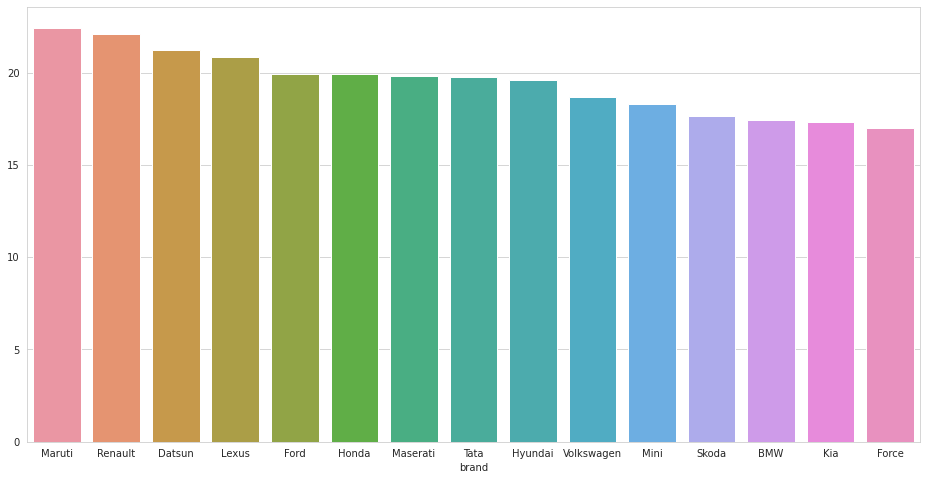

In [451]:
fig, ax = plt.subplots(figsize=(16,8))
sns.set_style('whitegrid')
sns.barplot(x=mileage.index, y=mileage.values)

**Observation**

from above chart we can observe that maruthi brand having a highest milage followed by Renult

 Car with Highest Mileage

In [452]:
mileage_C= df.groupby('car_name')['mileage'].mean().sort_values(ascending=False).head(10)
mileage_C.to_frame()

,mileage
car_name,
Tata Tiago,24.625103
Maruti Ciaz,24.289046
Maruti Vitara,24.231932
Renault KWID,24.037810
Maruti Celerio,23.703502
Maruti Dzire VXI,23.512941
Maruti Dzire LXI,23.260000
Maruti Dzire ZXI,23.260000
Ford Aspire,22.993846


<AxesSubplot:xlabel='car_name'>

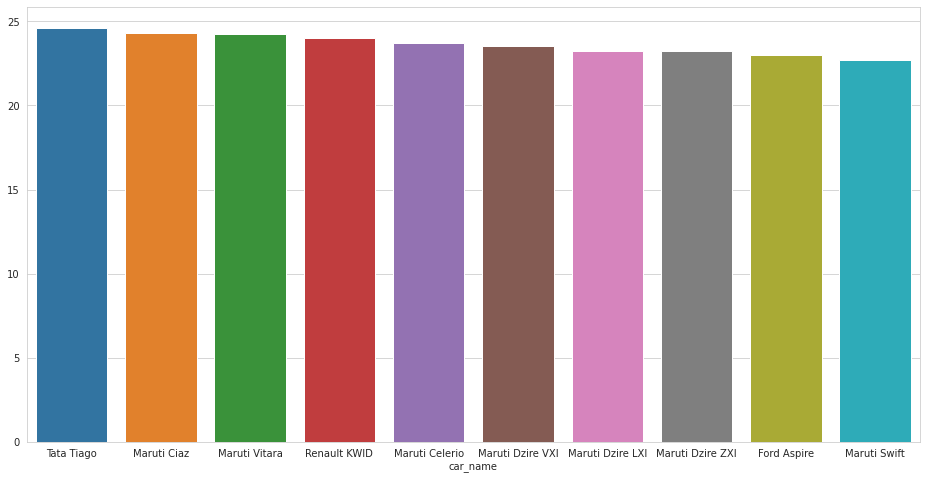

In [453]:
fig, ax = plt.subplots(figsize=(16,8))
sns.set_style('whitegrid')
sns.barplot(x=mileage_C.index, y=mileage_C.values)

**Observation**

from above chart we can observe that tata tiago car having a highest milage 24.62 followed by maruti ciaz

Fuel Type Selling Price

In [454]:
fuel = df.groupby('fuel_type')['selling_price'].median().sort_values(ascending=False)
fuel.to_frame()

,selling_price
fuel_type,
Electric,1857500.0
Diesel,700000.0
Petrol,460000.0
CNG,370000.0
LPG,182500.0


<AxesSubplot:xlabel='fuel_type', ylabel='selling_price'>

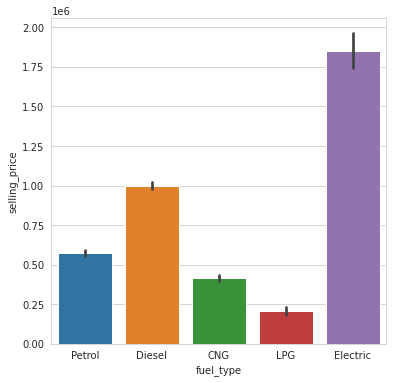

In [455]:
fig, ax = plt.subplots(figsize=(6,6))
sns.set_style('whitegrid')
sns.barplot(x=df.fuel_type, y=df.selling_price)

**Observation**
* Electric cars have highers selling average price.
* Followed by Diesel and Petrol.


 Most sold Fuel type

<AxesSubplot:xlabel='fuel_type', ylabel='count'>

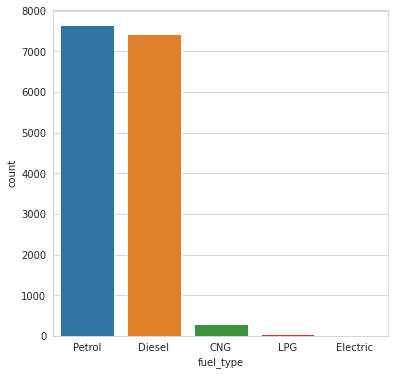

In [456]:
fig, ax = plt.subplots(figsize=(6,6))
sns.set_style('whitegrid')
sns.countplot(x=df.fuel_type)

**Observation** 

* The most sold fuel type Vechicle is Petrol.
* Followed by diesel and CNG and least sold is Electric

Vehicle age vs Selling Price

<AxesSubplot:xlabel='vehicle_age', ylabel='selling_price'>

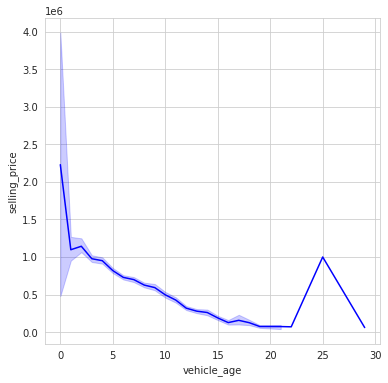

In [457]:
fig, ax = plt.subplots(figsize=(6,6))
sns.set_style('whitegrid')
sns.lineplot(x='vehicle_age',y='selling_price',data=df,color='b')

**Report** 
* As the Vehicle age increases the price also get reduced.
* Vehicle age has Negative impact on selling price

 Transmission Type

<AxesSubplot:xlabel='transmission_type', ylabel='count'>

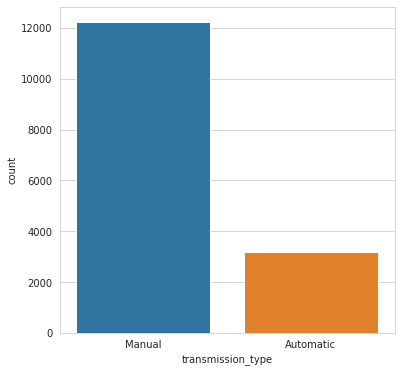

In [458]:
fig, ax = plt.subplots(figsize=(6,6))
sns.set_style('whitegrid')
sns.countplot(x='transmission_type', data=df)

**Observation**

we can observed that manual having highest count

<AxesSubplot:xlabel='transmission_type', ylabel='selling_price'>

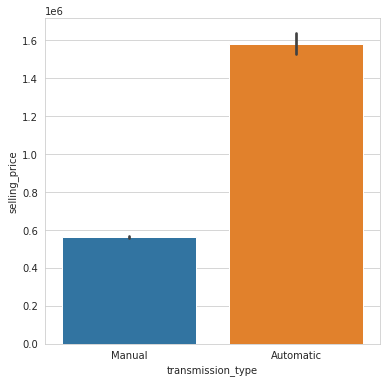

In [459]:
fig, ax = plt.subplots(figsize=(6,6))
sns.set_style('whitegrid')
sns.barplot(x='transmission_type', y='selling_price', data=df)

**Report** 
* Manual Transmission was found in most of the cars which was sold.
* Automatic cars have more selling price than manual cars.

## Seller Type

<AxesSubplot:xlabel='seller_type', ylabel='count'>

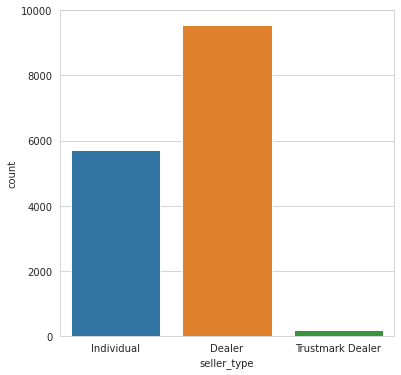

In [460]:
fig, ax = plt.subplots(figsize=(6,6))
sns.set_style('whitegrid')
sns.countplot(x='seller_type', data=df)

In [461]:
dealer = df.groupby('seller_type')['selling_price'].median().sort_values(ascending=False)
dealer.to_frame()

,selling_price
seller_type,
Dealer,591000.0
Trustmark Dealer,540000.0
Individual,507000.0


**Observation**
* Dealers have put more ads on used car website.
* Dealers have put 9539 ads with median selling price of 5.91 Lakhs.
* Followed by Individual with 5699 ads with median selling price of 5.4 Lakhs.
* Dealers have more median selling price than Individual.

 **from the above EDA we can observe that**

 * The datatypes and Column names were right and there was 15411 rows and 13 columns

* There are outliers in the `km_driven`, `enginer`, `selling_price`, and `max power`.
* Dealers are the highest sellers of the used cars.
* Skewness is found in few of the columns 
* Vehicle age has negative impact on the price.
* Manual cars are mostly sold and automatic has higher selling average than manual cars.
* Petrol is the most preffered choice of fuel in used car website, followed by diesel and LPG.


In [462]:
categorical_features= [feature for feature in df if df[feature].dtype == 'object' and len(df[feature].unique()) < 25]

In [463]:
categorical_features

['seller_type', 'fuel_type', 'transmission_type']

In [464]:
for feature in categorical_features:
    print(feature,'\n', df[feature].unique())

seller_type 
 ['Individual' 'Dealer' 'Trustmark Dealer']
fuel_type 
 ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
transmission_type 
 ['Manual' 'Automatic']


In [465]:
df["seller_type"] = df["seller_type"].replace(['Individual', 'Dealer' ,'Trustmark Dealer'],[1,2,3])

In [466]:
df["fuel_type"] = df["fuel_type"].replace(['Petrol','Diesel', 'CNG', 'LPG' ,'Electric'],[1,2,3,4,5])



In [467]:
df["transmission_type"] = df["transmission_type"].replace(['Manual' , 'Automatic'],[1,2])

In [468]:
import pandas as pd


# define a function to group rare categories together
def group_rare_categories(series, threshold=0.05):
    # count the frequency of each category
    counts = series.value_counts(normalize=True)
    # get the names of categories that occur less than the threshold frequency
    rare_categories = counts[counts < threshold].index
    # replace the rare categories with 'other'
    return series.replace(rare_categories, 'other')

# group the categorical data by column and encode it with numerical values
df['car_name_grouped'] = df.groupby('car_name')['car_name'].transform(group_rare_categories)
df['brand_grouped'] = df.groupby('brand')['brand'].transform(group_rare_categories)
df['model_grouped'] = df.groupby('model')['model'].transform(group_rare_categories)
df['car_name_encoded'] = pd.factorize(df['car_name_grouped'])[0]
df['brand_encoded'] = pd.factorize(df['brand_grouped'])[0]
df['model_encoded'] = pd.factorize(df['model_grouped'])[0]
# display the resulting dataframe
print(df)


              car_name     brand     model  vehicle_age  km_driven  \
0          Maruti Alto    Maruti      Alto            9     120000   
1        Hyundai Grand   Hyundai     Grand            5      20000   
2          Hyundai i20   Hyundai       i20           11      60000   
3          Maruti Alto    Maruti      Alto            9      37000   
4        Ford Ecosport      Ford  Ecosport            6      30000   
...                ...       ...       ...          ...        ...   
15406      Hyundai i10   Hyundai       i10            9      10723   
15407    Maruti Ertiga    Maruti    Ertiga            2      18000   
15408      Skoda Rapid     Skoda     Rapid            6      67000   
15409  Mahindra XUV500  Mahindra    XUV500            5    3800000   
15410       Honda City     Honda      City            2      13000   

       seller_type  fuel_type  transmission_type  mileage  engine  max_power  \
0                1          1                  1    19.70     796      46.30   

In [469]:
df=df.drop(['car_name', 'brand', 'model','car_name_grouped','brand_grouped','model_grouped'],axis=1)

In [470]:
df.shape

(15411, 13)

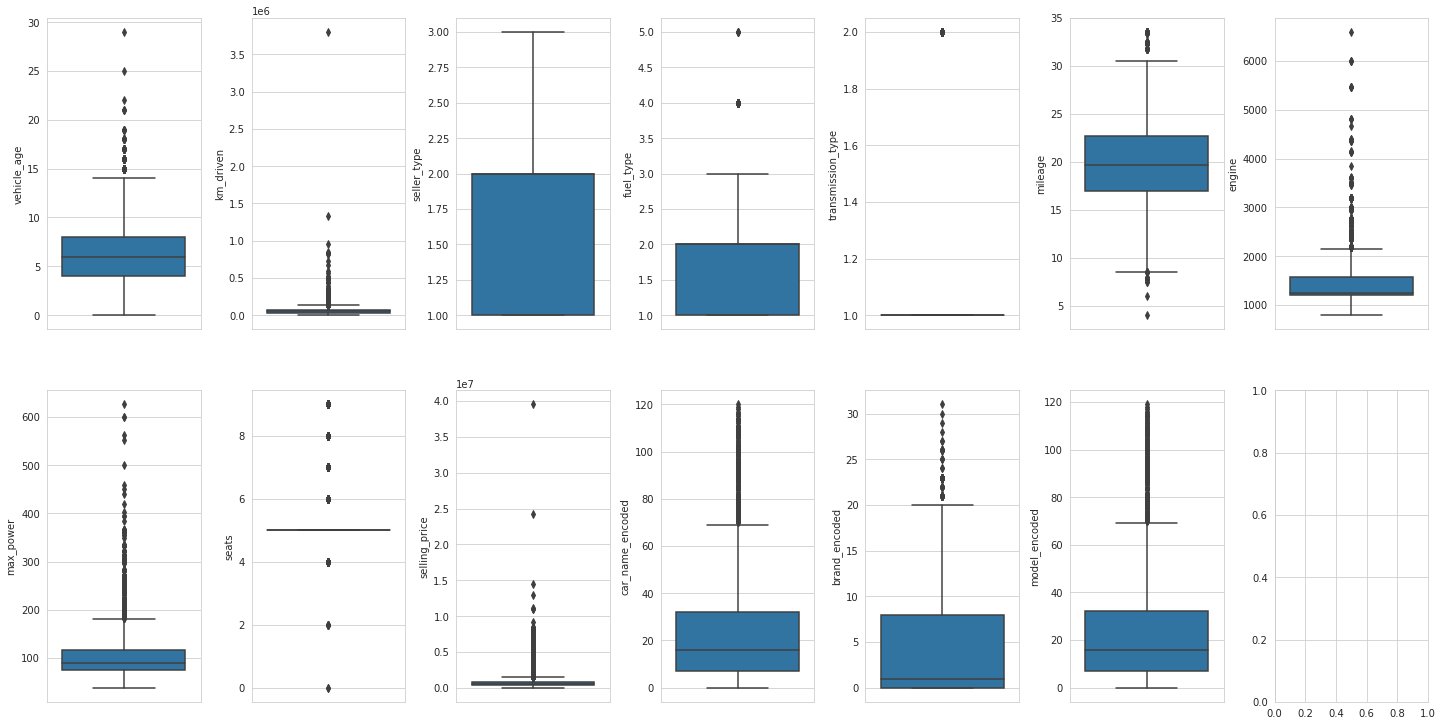

In [471]:
#checking outiliers in dataset
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data= df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [472]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vehicle_age        15411 non-null  int64  
 1   km_driven          15411 non-null  int64  
 2   seller_type        15411 non-null  int64  
 3   fuel_type          15411 non-null  int64  
 4   transmission_type  15411 non-null  int64  
 5   mileage            15411 non-null  float64
 6   engine             15411 non-null  int64  
 7   max_power          15411 non-null  float64
 8   seats              15411 non-null  int64  
 9   selling_price      15411 non-null  int64  
 10  car_name_encoded   15411 non-null  int64  
 11  brand_encoded      15411 non-null  int64  
 12  model_encoded      15411 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1.5 MB


In [473]:
   for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column vehicle_age outliers = 1.84%
Column km_driven outliers = 3.15%
Column seller_type outliers = 0.00%
Column fuel_type outliers = 0.31%
Column transmission_type outliers = 100.00%
Column mileage outliers = 0.57%
Column engine outliers = 13.82%
Column max_power outliers = 5.63%
Column seats outliers = 100.00%
Column selling_price outliers = 9.01%
Column car_name_encoded outliers = 4.11%
Column brand_encoded outliers = 2.77%
Column model_encoded outliers = 4.11%


In [474]:

# Identify the columns with potential outliers
outlier_cols = ['vehicle_age', 'km_driven','engine','mileage','max_power',
       'selling_price']

# Replace outliers with the upper and lower bounds
for col in outlier_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])


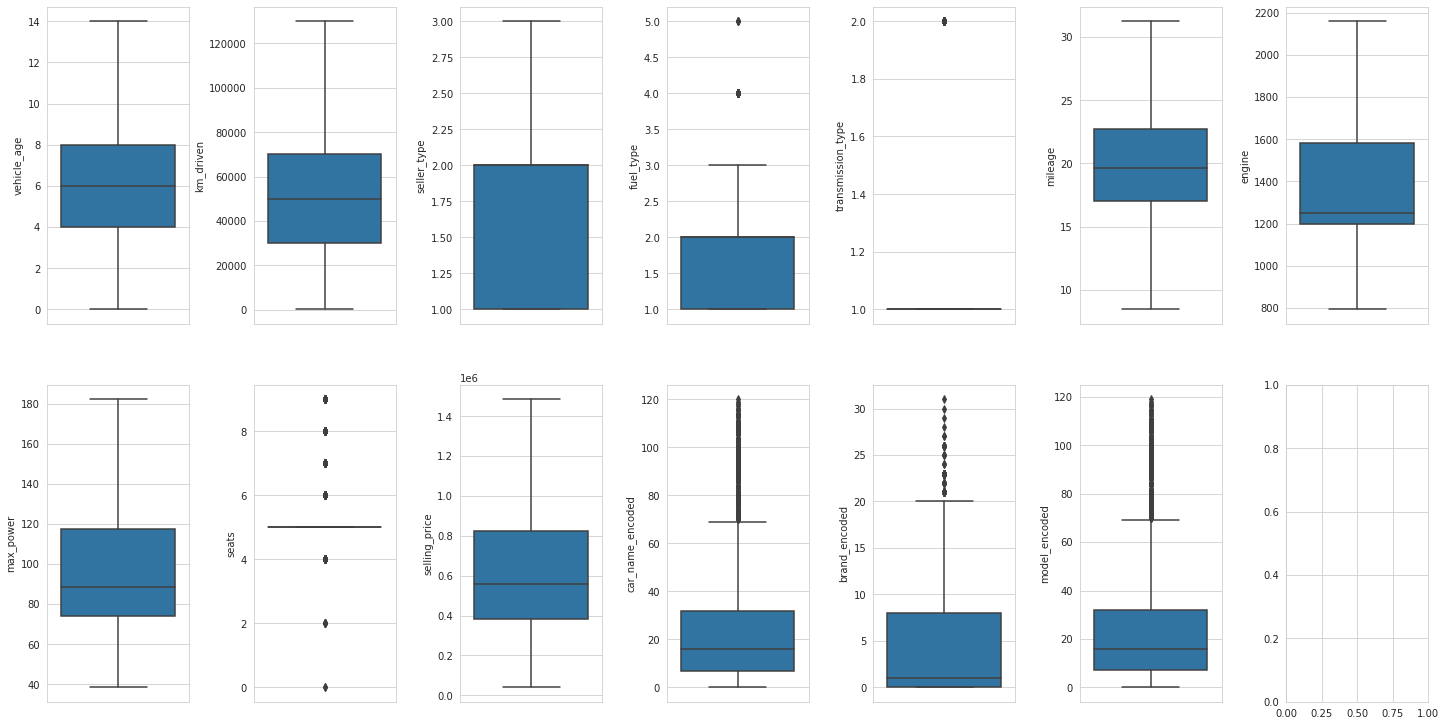

In [475]:
#checking outiliers in dataset
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data= df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

* Check Multicollinearity in Numerical features

In [481]:
df.corr()

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,car_name_encoded,brand_encoded,model_encoded
vehicle_age,1.000000,0.518889,0.023144,0.030948,-0.081038,-0.259837,0.090285,-0.011568,0.032851,-0.396600,-0.103219,0.010821,-0.103177
km_driven,0.518889,1.000000,-0.098430,0.340904,-0.109473,-0.126463,0.267537,0.081206,0.245827,-0.123799,-0.044984,0.064318,-0.044965
seller_type,0.023144,-0.098430,1.000000,0.006325,0.190522,-0.066263,0.088547,0.168547,-0.062908,0.153192,0.069579,0.078185,0.069565
fuel_type,0.030948,0.340904,0.006325,1.000000,-0.011201,0.166644,0.429361,0.242333,0.294736,0.294995,0.147739,0.153068,0.147728
transmission_type,-0.081038,-0.109473,0.190522,-0.011201,1.000000,-0.283121,0.337390,0.538917,-0.058527,0.514609,0.352256,0.331451,0.352241
mileage,-0.259837,-0.126463,-0.066263,0.166644,-0.283121,1.000000,-0.621563,-0.552769,-0.441764,-0.364706,-0.263508,-0.398985,-0.263495
engine,0.090285,0.267537,0.088547,0.429361,0.337390,-0.621563,1.000000,0.825879,0.559214,0.691285,0.411373,0.588832,0.411368
max_power,-0.011568,0.081206,0.168547,0.242333,0.538917,-0.552769,0.825879,1.000000,0.231314,0.805494,0.496807,0.585284,0.496811
seats,0.032851,0.245827,-0.062908,0.294736,-0.058527,-0.441764,0.559214,0.231314,1.000000,0.268077,0.116704,0.199840,0.116634
selling_price,-0.396600,-0.123799,0.153192,0.294995,0.514609,-0.364706,0.691285,0.805494,0.268077,1.000000,0.440502,0.440431,0.440491


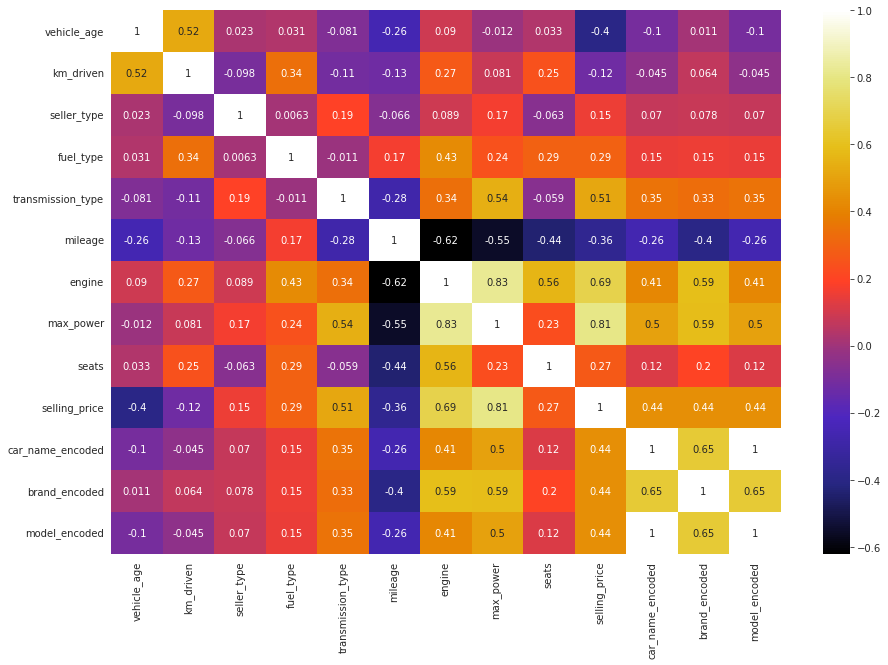

In [482]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

**Observation**

from above heatmap we can observe that

*max_power has good corelation with traget column(0.81)

*engine has good corelation with traget column(0.69)

*milege  having a negative corelation with target column


In [479]:
#defining dependent and independent variable as y and x
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [485]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=.30,random_state=42)



In [486]:
# Define the model
tree = DecisionTreeRegressor(min_samples_split=3, max_depth=3)
tree.fit(X_train,Y_train)


DecisionTreeRegressor(max_depth=3, min_samples_split=3)

In [487]:

print(tree.score(X_train,Y_train))
print(tree.score(X_test,Y_test))


0.9808963641170773
0.9807631281393491
